In [15]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow import keras 
from tensorflow.keras import layers
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images[:15000,:,:]
train_labels = train_labels[:15000]
test_images = test_images[:2000,:,:]
test_labels = test_labels[:2000]
train_images.shape

(15000, 28, 28)

In [2]:
train_images = train_images.reshape((15000, 28 * 28))
train_images = train_images.astype("float32") / 255 
test_images = test_images.reshape((2000, 28 * 28))
test_images = test_images.astype("float32") / 255
print(test_images.shape)
train_images.shape

(2000, 784)


(15000, 784)

2024-09-26 23:27:30.352129: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-26 23:27:30.439728: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-26 23:27:30.439765: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-26 23:27:30.441935: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-26 23:27:30.441967: I external/local_xla/xla/stream_executor

0.001
Epoch 1/25


2024-09-26 23:27:32.410248: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f946c7be820 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-09-26 23:27:32.410303: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): Quadro T2000, Compute Capability 7.5
2024-09-26 23:27:32.428589: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-26 23:27:32.503246: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8906
I0000 00:00:1727393252.591584    1188 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


118/118 [==============================] - 2s 9ms/step - loss: 0.4675 - accuracy: 0.8685 - val_loss: 0.5528 - val_accuracy: 0.8030
Epoch 2/25
118/118 [==============================] - 1s 7ms/step - loss: 0.2189 - accuracy: 0.9379 - val_loss: 0.3563 - val_accuracy: 0.8915
Epoch 3/25
118/118 [==============================] - 1s 7ms/step - loss: 0.1513 - accuracy: 0.9563 - val_loss: 0.2130 - val_accuracy: 0.9290
Epoch 4/25
118/118 [==============================] - 1s 7ms/step - loss: 0.1101 - accuracy: 0.9685 - val_loss: 0.1894 - val_accuracy: 0.9415
Epoch 5/25
118/118 [==============================] - 1s 8ms/step - loss: 0.0817 - accuracy: 0.9780 - val_loss: 0.1893 - val_accuracy: 0.9420
Epoch 6/25
118/118 [==============================] - 1s 7ms/step - loss: 0.0638 - accuracy: 0.9841 - val_loss: 0.1577 - val_accuracy: 0.9550
Epoch 7/25
118/118 [==============================] - 1s 11ms/step - loss: 0.0487 - accuracy: 0.9867 - val_loss: 0.1748 - val_accuracy: 0.9465
Epoch 8/25
118/1

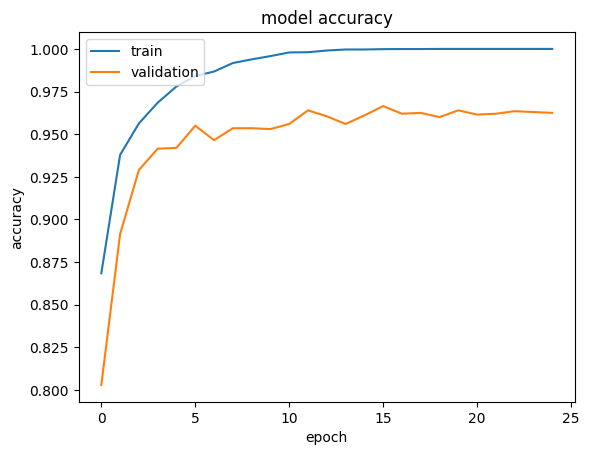

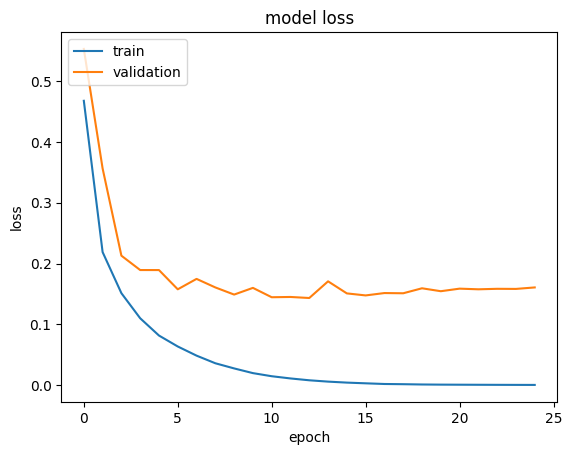

In [3]:
# RMSprop defaults to 0.001 learning rate

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
optimizer = tf.keras.optimizers.RMSprop()  # or any other optimizer
print(optimizer.learning_rate.numpy())  # or print(optimizer.lr.numpy())

model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train_images, train_labels, epochs=25, batch_size=128, validation_data=(test_images, test_labels))

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Epoch 1/25
118/118 [==============================] - 3s 15ms/step - loss: 2075.9976 - accuracy: 0.5150 - val_loss: 3.9174 - val_accuracy: 0.3000
Epoch 2/25
118/118 [==============================] - 1s 11ms/step - loss: 6.4514 - accuracy: 0.2736 - val_loss: 3.2110 - val_accuracy: 0.2365
Epoch 3/25
118/118 [==============================] - 2s 20ms/step - loss: 3.0210 - accuracy: 0.2185 - val_loss: 2.5219 - val_accuracy: 0.2170
Epoch 4/25
118/118 [==============================] - 2s 13ms/step - loss: 2.3077 - accuracy: 0.2126 - val_loss: 2.3469 - val_accuracy: 0.2155
Epoch 5/25
118/118 [==============================] - 1s 12ms/step - loss: 3.0614 - accuracy: 0.2445 - val_loss: 2.1644 - val_accuracy: 0.2450
Epoch 6/25
118/118 [==============================] - 1s 9ms/step - loss: 2.2419 - accuracy: 0.2262 - val_loss: 2.7205 - val_accuracy: 0.2000
Epoch 7/25
118/118 [==============================] - 2s 16ms/step - loss: 2.6053 - accuracy: 0.2071 - val_loss: 3.6010 - val_accuracy: 0.22

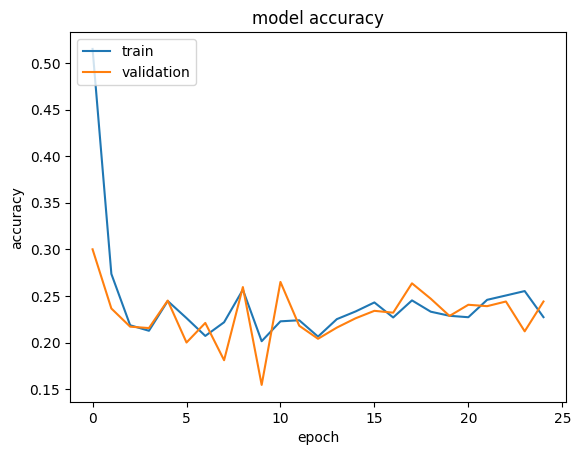

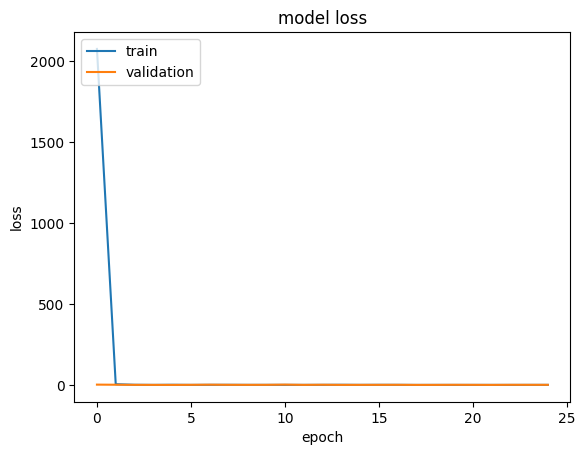

In [4]:
# learning rate = 1
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(tf.keras.optimizers.RMSprop(
    learning_rate=1),
              loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train_images, train_labels, epochs=25, batch_size=128, validation_data=(test_images, test_labels))
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Epoch 1/25
118/118 [==============================] - 2s 11ms/step - loss: 1.2235 - accuracy: 0.7433 - val_loss: 0.8279 - val_accuracy: 0.8165
Epoch 2/25
118/118 [==============================] - 1s 10ms/step - loss: 0.5516 - accuracy: 0.8765 - val_loss: 0.5650 - val_accuracy: 0.8525
Epoch 3/25
118/118 [==============================] - 1s 10ms/step - loss: 0.4048 - accuracy: 0.8995 - val_loss: 0.4690 - val_accuracy: 0.8710
Epoch 4/25
118/118 [==============================] - 1s 8ms/step - loss: 0.3437 - accuracy: 0.9109 - val_loss: 0.4172 - val_accuracy: 0.8795
Epoch 5/25
118/118 [==============================] - 1s 9ms/step - loss: 0.3075 - accuracy: 0.9195 - val_loss: 0.3856 - val_accuracy: 0.8910
Epoch 6/25
118/118 [==============================] - 1s 10ms/step - loss: 0.2817 - accuracy: 0.9256 - val_loss: 0.3635 - val_accuracy: 0.8930
Epoch 7/25
118/118 [==============================] - 1s 9ms/step - loss: 0.2622 - accuracy: 0.9305 - val_loss: 0.3410 - val_accuracy: 0.9010
Ep

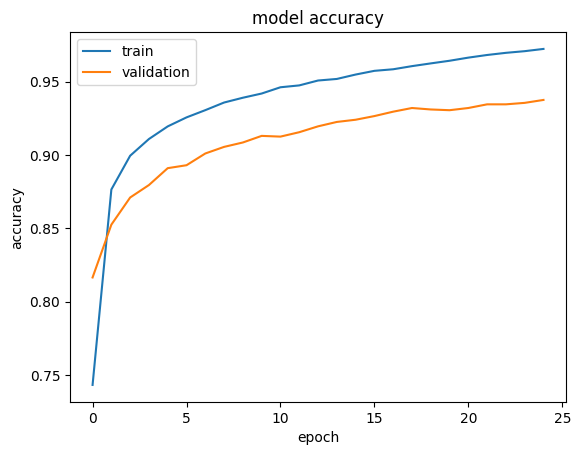

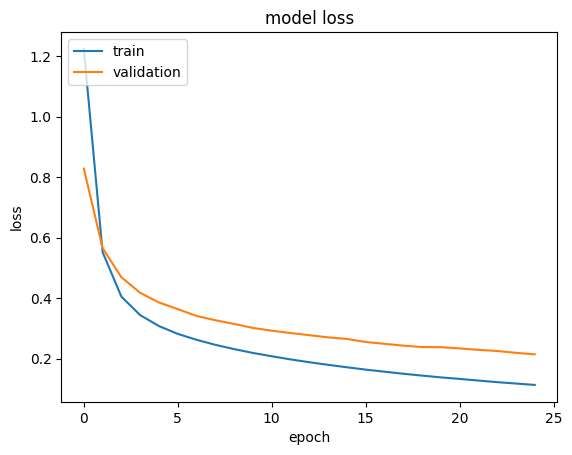

In [5]:
# learning rate = 0.0001
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(tf.keras.optimizers.RMSprop(
    learning_rate=0.0001),
              loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train_images, train_labels, epochs=25, batch_size=128, validation_data=(test_images, test_labels))
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

0.001
Epoch 1/25
118/118 [==============================] - 3s 17ms/step - loss: 0.4876 - accuracy: 0.8653 - val_loss: 0.3359 - val_accuracy: 0.9005
Epoch 2/25
118/118 [==============================] - 2s 13ms/step - loss: 0.2143 - accuracy: 0.9397 - val_loss: 0.2530 - val_accuracy: 0.9200
Epoch 3/25
118/118 [==============================] - 1s 12ms/step - loss: 0.1489 - accuracy: 0.9589 - val_loss: 0.2041 - val_accuracy: 0.9390
Epoch 4/25
118/118 [==============================] - 1s 8ms/step - loss: 0.1112 - accuracy: 0.9674 - val_loss: 0.2173 - val_accuracy: 0.9365
Epoch 5/25
118/118 [==============================] - 1s 7ms/step - loss: 0.0828 - accuracy: 0.9781 - val_loss: 0.1717 - val_accuracy: 0.9465
Epoch 6/25
118/118 [==============================] - 1s 8ms/step - loss: 0.0609 - accuracy: 0.9851 - val_loss: 0.1650 - val_accuracy: 0.9465
Epoch 7/25
118/118 [==============================] - 1s 7ms/step - loss: 0.0463 - accuracy: 0.9889 - val_loss: 0.1594 - val_accuracy: 0.95

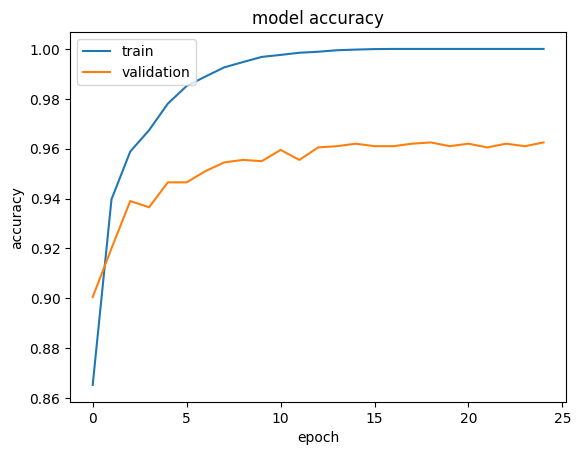

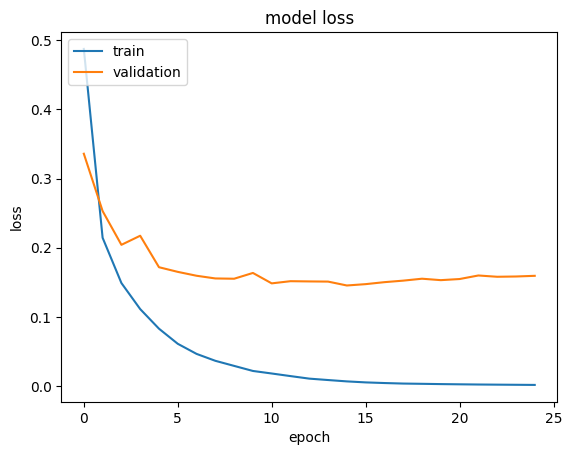

In [6]:
# Adam optimizer default learning rate = 0.001
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
optimizer = tf.keras.optimizers.Adam()  # or any other optimizer
print(optimizer.learning_rate.numpy())
model.compile(optimizer = optimizer,
              loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train_images, train_labels, epochs=25, batch_size=128, validation_data=(test_images, test_labels))
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

1.0
Epoch 1/25
118/118 [==============================] - 2s 9ms/step - loss: 393.6122 - accuracy: 0.2770 - val_loss: 2.2422 - val_accuracy: 0.2600
Epoch 2/25
118/118 [==============================] - 1s 10ms/step - loss: 2.2148 - accuracy: 0.2408 - val_loss: 2.2004 - val_accuracy: 0.2140
Epoch 3/25
118/118 [==============================] - 1s 9ms/step - loss: 2.1626 - accuracy: 0.1877 - val_loss: 2.6381 - val_accuracy: 0.2605
Epoch 4/25
118/118 [==============================] - 1s 11ms/step - loss: 2.2432 - accuracy: 0.2047 - val_loss: 2.5443 - val_accuracy: 0.1850
Epoch 5/25
118/118 [==============================] - 1s 9ms/step - loss: 2.1789 - accuracy: 0.1713 - val_loss: 2.2933 - val_accuracy: 0.2065
Epoch 6/25
118/118 [==============================] - 1s 8ms/step - loss: 2.1904 - accuracy: 0.1749 - val_loss: 2.3080 - val_accuracy: 0.2055
Epoch 7/25
118/118 [==============================] - 1s 8ms/step - loss: 2.2339 - accuracy: 0.1743 - val_loss: 2.3676 - val_accuracy: 0.200

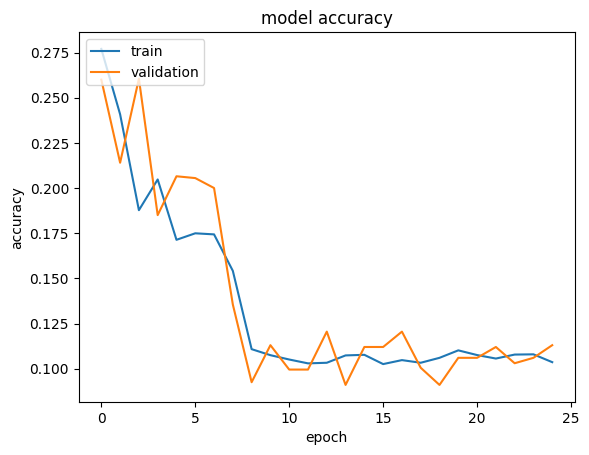

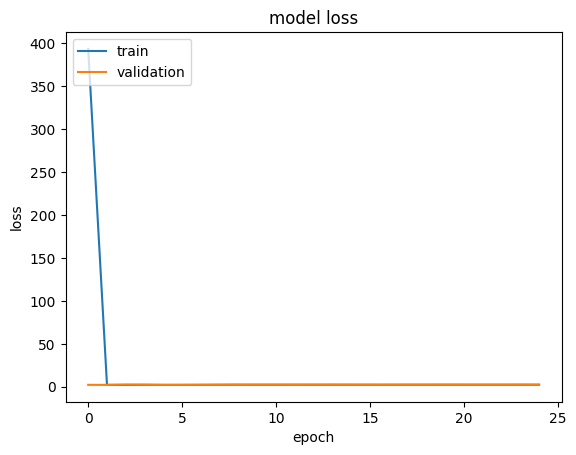

In [7]:
# Adam optimizer learning rate = 1.0
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
optimizer = tf.keras.optimizers.Adam(1.0)  # or any other optimizer
print(optimizer.learning_rate.numpy())
model.compile(optimizer = optimizer,
              loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train_images, train_labels, epochs=25, batch_size=128, validation_data=(test_images, test_labels))
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# exponential decay learning rate
learning rate = initial_learning_rate * decay_rate ^ (step / decay_steps)

Epoch 1/25
118/118 [==============================] - 2s 11ms/step - loss: 1.1223 - accuracy: 0.7382 - val_loss: 0.7418 - val_accuracy: 0.7975
Epoch 2/25
118/118 [==============================] - 1s 10ms/step - loss: 0.5238 - accuracy: 0.8729 - val_loss: 0.5555 - val_accuracy: 0.8480
Epoch 3/25
118/118 [==============================] - 1s 10ms/step - loss: 0.4172 - accuracy: 0.8915 - val_loss: 0.4871 - val_accuracy: 0.8600
Epoch 4/25
118/118 [==============================] - 1s 9ms/step - loss: 0.3688 - accuracy: 0.9016 - val_loss: 0.4505 - val_accuracy: 0.8730
Epoch 5/25
118/118 [==============================] - 1s 7ms/step - loss: 0.3384 - accuracy: 0.9095 - val_loss: 0.4258 - val_accuracy: 0.8710
Epoch 6/25
118/118 [==============================] - 1s 8ms/step - loss: 0.3160 - accuracy: 0.9151 - val_loss: 0.3993 - val_accuracy: 0.8870
Epoch 7/25
118/118 [==============================] - 1s 10ms/step - loss: 0.2987 - accuracy: 0.9197 - val_loss: 0.3810 - val_accuracy: 0.8895
Ep

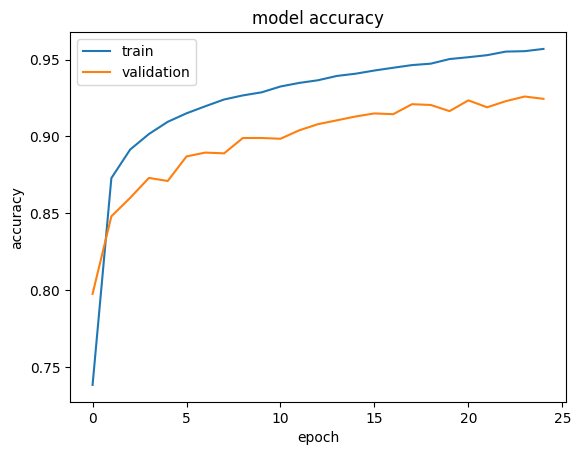

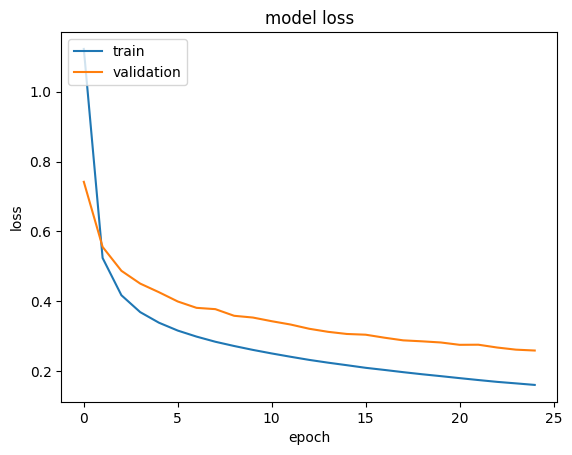

In [8]:
# SGD 
optimizer = keras.optimizers.SGD(learning_rate=0.04)
# SGD optimizer with exponential decay
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer = optimizer,
              loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train_images, train_labels, epochs=25, batch_size=128, validation_data=(test_images, test_labels))
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [9]:
for i in range(25):
    print(1 * 0.7 ** i/25)

0.04
0.027999999999999997
0.019599999999999996
0.013719999999999996
0.009603999999999998
0.0067227999999999975
0.004705959999999999
0.0032941719999999984
0.0023059203999999988
0.0016141442799999992
0.0011299009959999994
0.0007909306971999995
0.0005536514880399996
0.00038755604162799966
0.0002712892291395998
0.00018990246039771982
0.00013293172227840387
9.305220559488269e-05
6.513654391641788e-05
4.559558074149252e-05
3.191690651904476e-05
2.234183456333133e-05
1.563928419433193e-05
1.0947498936032352e-05
7.663249255222645e-06


Epoch 1/25
118/118 [==============================] - 2s 13ms/step - loss: 0.5187 - accuracy: 0.8424 - val_loss: 0.3569 - val_accuracy: 0.8900
Epoch 2/25
118/118 [==============================] - 1s 9ms/step - loss: 0.2273 - accuracy: 0.9365 - val_loss: 0.3052 - val_accuracy: 0.9100
Epoch 3/25
118/118 [==============================] - 1s 11ms/step - loss: 0.2116 - accuracy: 0.9413 - val_loss: 0.2998 - val_accuracy: 0.9095
Epoch 4/25
118/118 [==============================] - 1s 11ms/step - loss: 0.2084 - accuracy: 0.9422 - val_loss: 0.2992 - val_accuracy: 0.9090
Epoch 5/25
118/118 [==============================] - 1s 10ms/step - loss: 0.2078 - accuracy: 0.9422 - val_loss: 0.2990 - val_accuracy: 0.9095
Epoch 6/25
118/118 [==============================] - 1s 8ms/step - loss: 0.2077 - accuracy: 0.9423 - val_loss: 0.2990 - val_accuracy: 0.9090
Epoch 7/25
118/118 [==============================] - 1s 9ms/step - loss: 0.2077 - accuracy: 0.9423 - val_loss: 0.2990 - val_accuracy: 0.9095
Ep

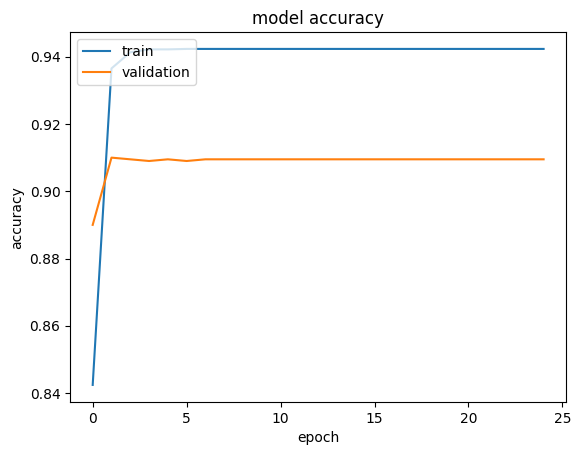

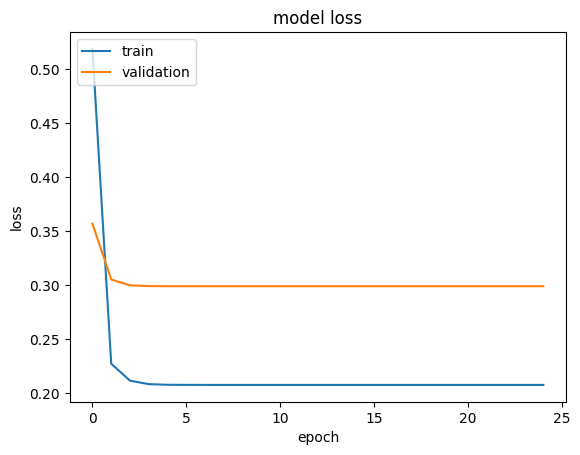

In [10]:
# SGD with exponential learning rate
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1.0,
    decay_steps=25,
    decay_rate=0.7)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)
# SGD optimizer with exponential decay
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer = optimizer,
              loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train_images, train_labels, epochs=25, batch_size=128, validation_data=(test_images, test_labels))
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Epoch 1/25
118/118 [==============================] - 2s 13ms/step - loss: 0.3496 - accuracy: 0.8957 - val_loss: 0.2271 - val_accuracy: 0.9300
Epoch 2/25
118/118 [==============================] - 1s 8ms/step - loss: 0.1207 - accuracy: 0.9653 - val_loss: 0.1848 - val_accuracy: 0.9455
Epoch 3/25
118/118 [==============================] - 1s 12ms/step - loss: 0.0959 - accuracy: 0.9741 - val_loss: 0.1810 - val_accuracy: 0.9465
Epoch 4/25
118/118 [==============================] - 1s 12ms/step - loss: 0.0911 - accuracy: 0.9754 - val_loss: 0.1801 - val_accuracy: 0.9455
Epoch 5/25
118/118 [==============================] - 1s 9ms/step - loss: 0.0901 - accuracy: 0.9758 - val_loss: 0.1800 - val_accuracy: 0.9465
Epoch 6/25
118/118 [==============================] - 1s 8ms/step - loss: 0.0900 - accuracy: 0.9759 - val_loss: 0.1800 - val_accuracy: 0.9465
Epoch 7/25
118/118 [==============================] - 1s 10ms/step - loss: 0.0899 - accuracy: 0.9759 - val_loss: 0.1800 - val_accuracy: 0.9465
Ep

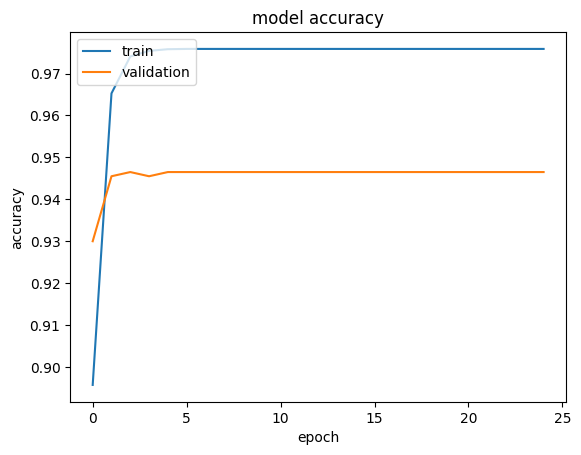

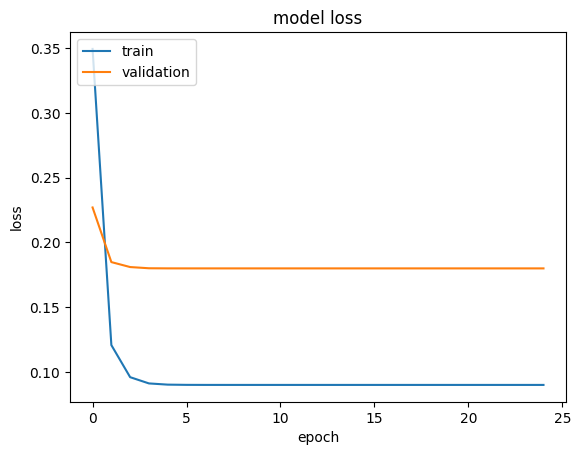

In [11]:
# Adam with exponential learning rate
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=25,
    decay_rate=0.7)
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)
# Adam optimizer with exponential decay
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer = optimizer,
              loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train_images, train_labels, epochs=25, batch_size=128, validation_data=(test_images, test_labels))
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# batch size

In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer='rmsprop',
              loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train_images, train_labels, epochs=3, batch_size=5, validation_data=(test_images, test_labels))

Epoch 1/3
3000/3000 [==============================] - 24s 8ms/step - loss: 0.3361 - accuracy: 0.9046 - val_loss: 0.2524 - val_accuracy: 0.9275
Epoch 2/3
3000/3000 [==============================] - 24s 8ms/step - loss: 0.1661 - accuracy: 0.9577 - val_loss: 0.2433 - val_accuracy: 0.9355
Epoch 3/3
3000/3000 [==============================] - 24s 8ms/step - loss: 0.1092 - accuracy: 0.9716 - val_loss: 0.2877 - val_accuracy: 0.9365


In [13]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer='rmsprop',
              loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train_images, train_labels, epochs=5, batch_size=1024, validation_data=(test_images, test_labels))

Epoch 1/5
15/15 [==============================] - 1s 37ms/step - loss: 1.0101 - accuracy: 0.7221 - val_loss: 0.6182 - val_accuracy: 0.8465
Epoch 2/5
15/15 [==============================] - 0s 21ms/step - loss: 0.4611 - accuracy: 0.8761 - val_loss: 0.5026 - val_accuracy: 0.8580
Epoch 3/5
15/15 [==============================] - 0s 15ms/step - loss: 0.3773 - accuracy: 0.8955 - val_loss: 0.4485 - val_accuracy: 0.8675
Epoch 4/5
15/15 [==============================] - 0s 15ms/step - loss: 0.3136 - accuracy: 0.9120 - val_loss: 0.4587 - val_accuracy: 0.8505
Epoch 5/5
15/15 [==============================] - 0s 15ms/step - loss: 0.2745 - accuracy: 0.9239 - val_loss: 0.3363 - val_accuracy: 0.8985


In [14]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer='rmsprop',
              loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train_images, train_labels, epochs=5, batch_size=5000, validation_data=(test_images, test_labels))

Epoch 1/5
3/3 [==============================] - 1s 144ms/step - loss: 1.8271 - accuracy: 0.4223 - val_loss: 1.3350 - val_accuracy: 0.6225
Epoch 2/5
3/3 [==============================] - 0s 67ms/step - loss: 1.0574 - accuracy: 0.7319 - val_loss: 0.9744 - val_accuracy: 0.6960
Epoch 3/5
3/3 [==============================] - 0s 51ms/step - loss: 0.7957 - accuracy: 0.7765 - val_loss: 0.7891 - val_accuracy: 0.7885
Epoch 4/5
3/3 [==============================] - 0s 37ms/step - loss: 0.6228 - accuracy: 0.8458 - val_loss: 0.6804 - val_accuracy: 0.8190
Epoch 5/5
3/3 [==============================] - 0s 35ms/step - loss: 0.5710 - accuracy: 0.8467 - val_loss: 0.6568 - val_accuracy: 0.8135
